In [14]:
import cv2 as cv
import numpy as np

In [15]:
def rgb_to_hex(in_col):
    col = 0
    col += int(in_col[2] / 64) & 0b11
    col <<= 3
    col += int(in_col[1] / 32) & 0b111
    col <<= 2
    col += int(in_col[0] / 64) & 0b11
    col <<= 1
    if in_col[3] > 0:
        col += 1
    else:
        col = 0b1000
    return col

In [16]:
rgb_to_hex([255, 132, 56, 1])

39

In [17]:
img = cv.imread('img.png', cv.IMREAD_UNCHANGED)
sprite = np.empty((img.shape[0:2]), dtype='int8')
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        col = rgb_to_hex(img[i][j])
        sprite[i][j] = col
        print(format(col, '02x'), end=' ')
    print('0A', end=' ')
print('0C')

08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 f5 f5 a5 a5 a5 a5 ad ad a5 ad ad 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 0A 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 f5 ad ad ed ed ad a5 a5 a5 a5 a5 9d 9b a5 a5 a5 a5 a5 a5 a5 5b 53 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 0A 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 ad ad f5 f5 ed a5 a5 a5 a5 9d 9b 5b 9b 5b 5b 5b 9b 9d 9d a5 a5 a5 a5 a5 5b 53 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 0A 08 08 08 08 08 08 08 08 08 08 08 08 08 08 08 a3 a5 a5 a5 ad a5 a5 a5 a5 9d a5 9d 5b 5b 5b 5b 5b 5b 53 53 53 53 53 5b 9d a5 a5 5b 5b 53 08 08 08 08 08 08 08 08 08 08 08 08 08 08 0A 08 08 08 08 08 08 08 08 08 08 08 08 08 08 a3 a5 a3 9b 9b 9b 9b a5 a5 9d 9b 9d 5b 5b 5b 5b 53 53 53 53 53 4b 4b 53 53 53 53 5b 9b 5b 5b 08 08 08 08 08 08 08 08 08 08 08 08 08 08 0A 08 08 08 08 08 08 08 08 08 08 08 08 08 a3 a3 9b 9b 5b 5b 9b 9b a3 9b 9b 9b 9b 9b 5b 5b 53 53 0b 0b 0

In [18]:
screen = np.empty((sprite.shape[0], sprite.shape[1], 3))
for i in range(0, sprite.shape[0]):
    for j in range(0, sprite.shape[1]):
        screen[i][j][0] = ((sprite[i][j] >> 6) & 0b11) / 3
        screen[i][j][1] = ((sprite[i][j] >> 3) & 0b111) / 7
        screen[i][j][2] = ((sprite[i][j] >> 1) & 0b11) / 3

(82, 59)


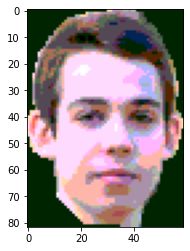

In [19]:
import matplotlib.pyplot as plt
print(sprite.shape)
plt.imshow(screen)